 File loaded successfully.

--- PERFORMANCE REPORT ---
Total valid rows analyzed: 921
Model Accuracy on Facebook Data: 70.03%
---------------------------



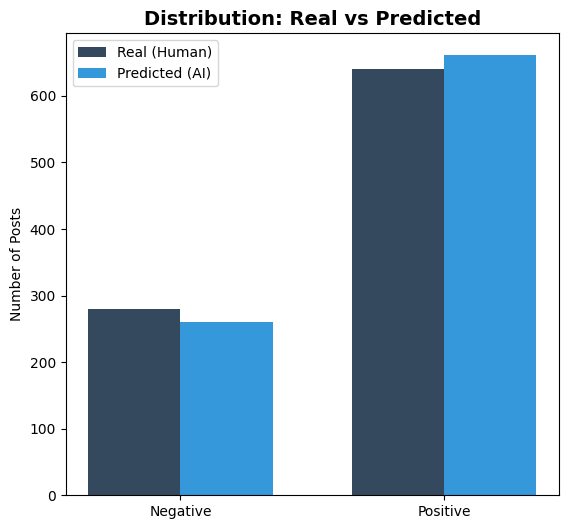

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


try:
    df = pd.read_csv('facebook_sentiment_results.csv', encoding='ISO-8859-1')
    print(" File loaded successfully.")
except Exception as e:
    print(f" Error loading file: {e}")


df['Label'] = df['Label'].astype(str).str.strip().str.upper()

df['real_numeric'] = df['Label'].map({'P': 1, 'O': 0})


df = df.dropna(subset=['real_numeric', 'sentiment_score'])


df['real_numeric'] = df['real_numeric'].astype(int)
df['sentiment_score'] = df['sentiment_score'].astype(int)


accuracy = accuracy_score(df['real_numeric'], df['sentiment_score'])
print(f"\n--- PERFORMANCE REPORT ---")
print(f"Total valid rows analyzed: {len(df)}")
print(f"Model Accuracy on Facebook Data: {accuracy*100:.2f}%")
print(f"---------------------------\n")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
real_counts = df['real_numeric'].value_counts().sort_index()
pred_counts = df['sentiment_score'].value_counts().sort_index()

r_neg, r_pos = real_counts.get(0, 0), real_counts.get(1, 0)
p_neg, p_pos = pred_counts.get(0, 0), pred_counts.get(1, 0)

labels = ['Negative', 'Positive']
real_vals = [r_neg, r_pos]
pred_vals = [p_neg, p_pos]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, real_vals, width, label='Real (Human)', color='#34495e')
plt.bar(x + width/2, pred_vals, width, label='Predicted (AI)', color='#3498db')

plt.title('Distribution: Real vs Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Number of Posts')
plt.xticks(x, labels)
plt.legend()